# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
17 campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.dummy import DummyClassifier


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [3]:
#Check for Missing Values
missing_counts = df.isnull().sum().sort_values()
print(missing_counts)

df.info()

# Remove duplicates, if any.
print("Before removing duplicates:", df.shape)

df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

# change the data types
df = df.convert_dtypes()

# What are the kinds of data in each column.
for col in df.columns:
    print(df[col].value_counts())
    print("")

# describe the data
df.describe(include = ['string'])


age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   mon

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  Int64  
 1   job             41176 non-null  string 
 2   marital         41176 non-null  string 
 3   education       41176 non-null  string 
 4   default         41176 non-null  string 
 5   housing         41176 non-null  string 
 6   loan            41176 non-null  string 
 7   contact         41176 non-null  string 
 8   month           41176 non-null  string 
 9   day_of_week     41176 non-null  string 
 10  duration        41176 non-null  Int64  
 11  campaign        41176 non-null  Int64  
 12  pdays           41176 non-null  Int64  
 13  previous        41176 non-null  Int64  
 14  poutcome        41176 non-null  string 
 15  emp.var.rate    41176 non-null  Float64
 16  cons.price.idx  41176 non-null  Float64
 17  cons.conf.idx   41176 non-null  Floa

In order to focus effort and limited resources on the most likely candidates for marketing campain.

The business objective is to discover what client characteristics and features are most likely to subscribe to a term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [4]:
# drop unnecessary columns
df = df.drop(['month', 'day_of_week', 'default', 'contact'] , axis = 1)

In [5]:
df["y"] = df["y"].apply(
    lambda x: 0 if (x == "no") else 1
)

In [6]:
# change the data types
df = df.convert_dtypes()

In [7]:
X = df.drop(['y'], axis=1)
y = df['y']  # target variable

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [8]:
# Divide the dataset into train/test (20% into test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [11]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.8873239436619719


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
# Define numerical and categorical features

# this is going to be a james-stein encoder... 
expanded_columns = ['job']
categorical_columns = ['marital','housing', 'loan', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
education_column = ['education']

expanded_encoder = ce.james_stein.JamesSteinEncoder()

# Create a preprocessor that applies both one-hot encoding for categorical variables and scaling for numerical variables, and an ordinal for condition (hiearchy of quality)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Standarize numerical features
        ('expanded',  expanded_encoder, expanded_columns),
        ('cat', OneHotEncoder(drop = 'if_binary', handle_unknown = 'ignore'), categorical_columns),  # One-Hot encoding for categorical features
        ('education', OrdinalEncoder(categories=[['illiterate', 'unknown', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]), education_column)
    ], remainder='passthrough')

X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_test_processed = preprocessor.transform(X_test)



In [13]:
logreg = LogisticRegression(max_iter=1000).fit(X_train_processed, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

Linear Regression RMSE: 0.3017674984454397
Accuracy Score: 0.9089363768819816


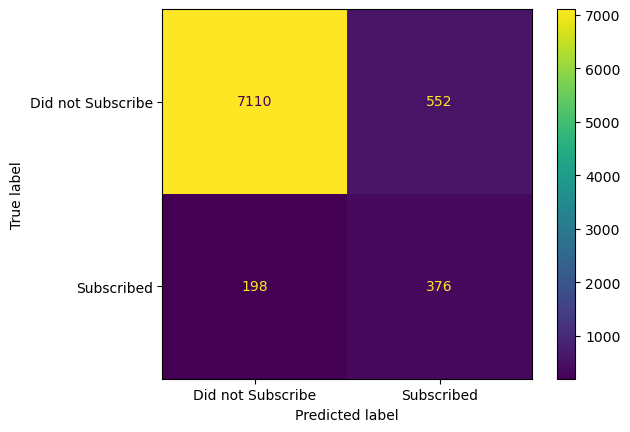

In [14]:
y_pred = logreg.predict(X_test_processed)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Linear Regression RMSE: {rmse}')

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy Score: {accuracy}')

cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=['Did not Subscribe', 'Subscribed'])
disp.plot()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [47]:
models = {"Logistic Regression":  LogisticRegression(max_iter=1000), "KNN":KNeighborsClassifier(), "Decision Tree":DecisionTreeClassifier(), "SVM": SVC()}
results = {"Model":[], "Model Predictions":[], "Train Time":[], "Train Accuracy":[], "Test Accuracy":[]}

In [48]:
# go thru each model, predict, and score
for model_name, model in models.items():
    train_time_start = time.time()
    model.fit(X_train_processed, y_train)
    train_time = time.time() - train_time_start
    
    y_train_predict = model.predict(X_train_processed)
    train_accuracy = accuracy_score(y_train_predict, y_train)

    y_test_predict = model.predict(X_test_processed)
    test_accuracy = accuracy_score(y_test_predict, y_test)

    results["Model"].append(model_name)
    results["Model Predictions"].append(y_test_predict)
    results["Train Time"].append(train_time)
    results["Train Accuracy"].append(train_accuracy)
    results["Test Accuracy"].append(test_accuracy)

In [50]:
# Display the Model Results - dataframe, then print
data_frame_results = pd.DataFrame(results).drop('Model Predictions', axis=1)

print ("Initial Model Results:")
print (data_frame_results)

Initial Model Results:
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.339891        0.909259       0.908936
1                  KNN    0.001181        0.928962       0.901894
2        Decision Tree    0.113715        1.000000       0.889509
3                  SVM   10.564291        0.908440       0.906144


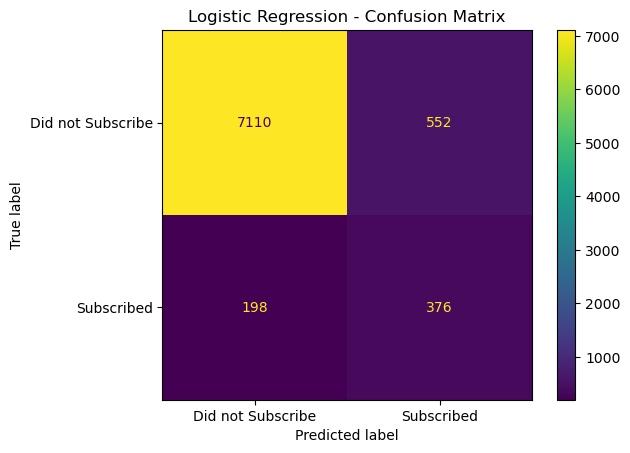

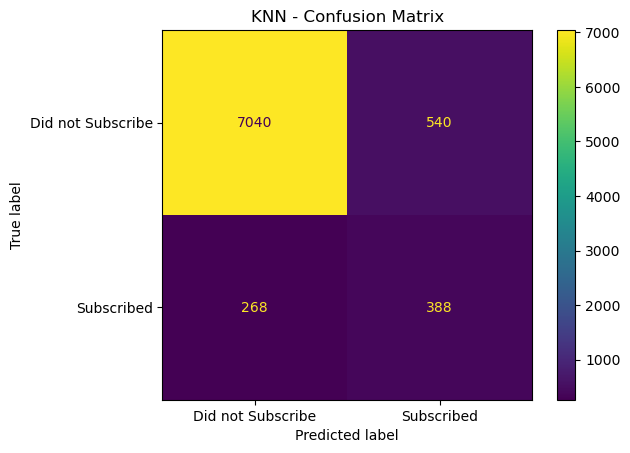

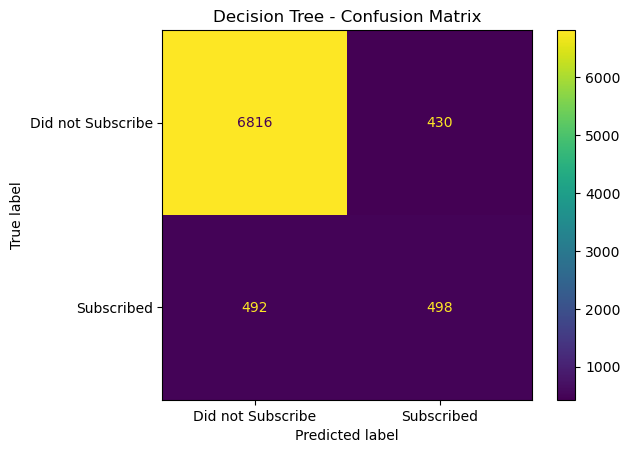

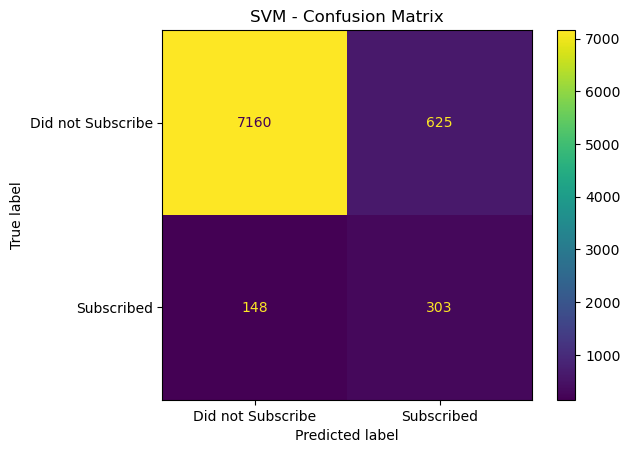

In [48]:
# Create Confusion Matrixes for the models
i = 0
for model_name in results["Model"]:
    model_predictions = results["Model Predictions"][i]
    
    cm = confusion_matrix(model_predictions, y_test)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Did not Subscribe', 'Subscribed'])
    
    disp.plot()
    disp.ax_.set_title(model_name + " - Confusion Matrix")
    i=i+1

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [43]:
# Hyperparameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 13],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.001, 0.1, 1, 5, 10],
        'fit_intercept': [False, True]
    },
    'Decision Tree': {
        'max_depth': [None, 3, 5, 9, 11, 13],
    }
}

# optimized results
optimized_results = {"Model":[], "Model Predictions":[], "Best Accuracy":[], "Best Parameters":[]}

In [44]:
# Initialize the best models dictionary
best_models = {}

# Perform grid search for each model
for model_name, model in models.items():

    print(f"Tuning {model_name}...")

    params = param_grids[model_name]
    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='accuracy',
        verbose=1
    )

    # Fit the grid search
    grid_search.fit(X_train_processed, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}\n")

    # predict, using best estimator
    y_test_predict = grid_search.predict(X_test_processed)

    # assign optimized values
    optimized_results["Model"].append(model_name)
    optimized_results["Model Predictions"].append(y_test_predict)
    optimized_results["Best Accuracy"].append(grid_search.best_score_)
    optimized_results["Best Parameters"].append(str(grid_search.best_params_))

Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 1, 'fit_intercept': True}
Best accuracy score for Logistic Regression: 0.9095324833029752

Tuning KNN...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best accuracy score for KNN: 0.9057073466909532

Tuning Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Decision Tree: {'max_depth': 5}
Best accuracy score for Decision Tree: 0.9126593806921676

Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score for SVM: 0.9093199757134183



In [45]:
# Display the Optimized Model Results - dataframe, then print
data_frame_optimized_results = pd.DataFrame(optimized_results).drop(['Model Predictions', 'Best Parameters'], axis=1)

print ("Optimized Model Results:")
print (data_frame_optimized_results)

Optimized Model Results:
                 Model  Best Accuracy
0  Logistic Regression       0.909532
1                  KNN       0.905707
2        Decision Tree       0.912659
3                  SVM       0.909320


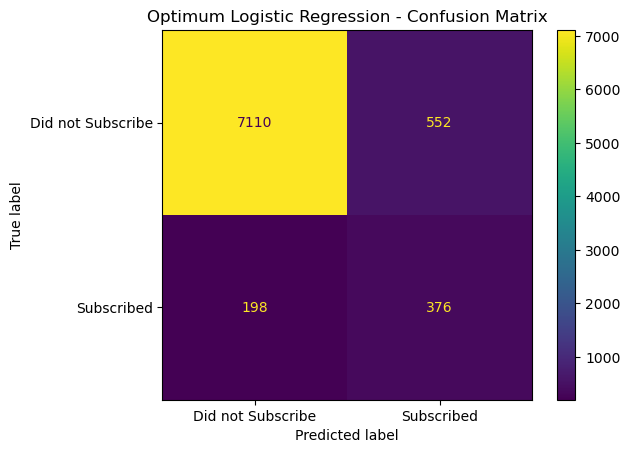

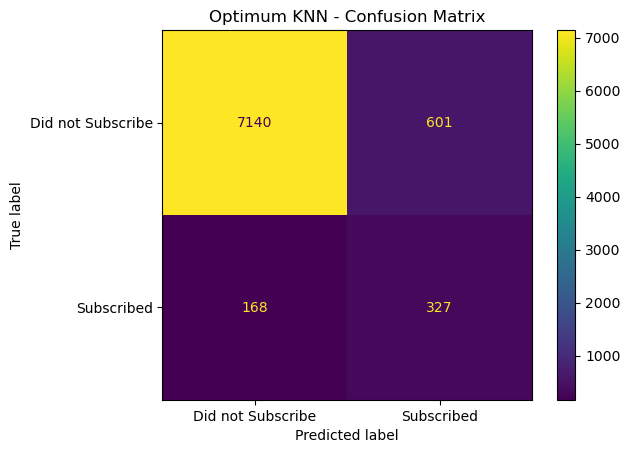

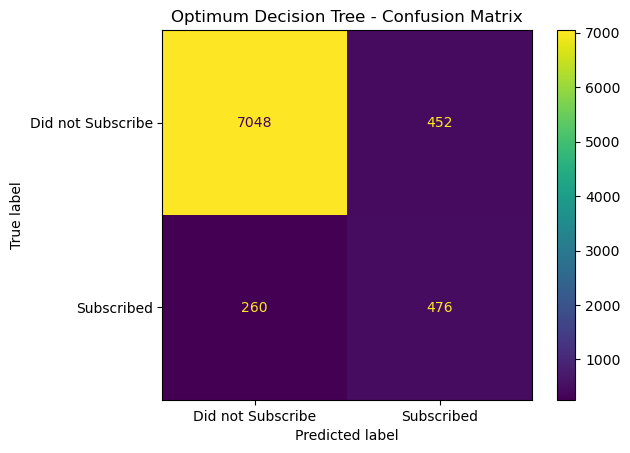

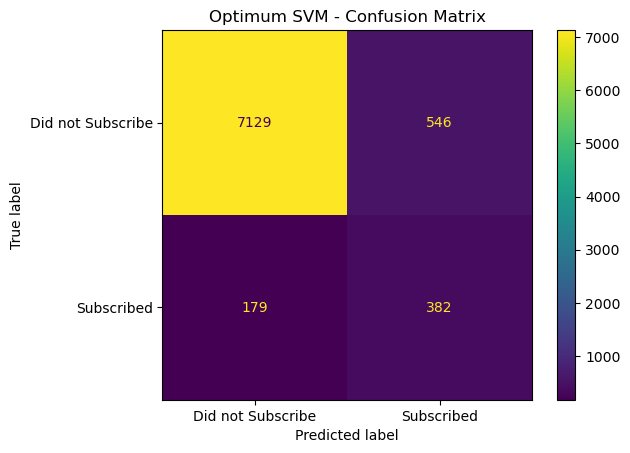

In [46]:
# Create Confusion Matrixes for the models
i = 0
for model_name in optimized_results["Model"]:
    model_predictions = optimized_results["Model Predictions"][i]
    
    cm = confusion_matrix(model_predictions, y_test)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Did not Subscribe', 'Subscribed'])
    
    disp.plot()
    disp.ax_.set_title("Optimum " + model_name + " - Confusion Matrix")
    i=i+1

##### Questions